# Predicting Miles Per Gallon of a Car 

In [1]:
#Importing all the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [2]:
#To read the csv file into a data frame
df = pd.read_csv("cars-dataset.csv")

In [3]:
#To verify the read operation
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
#To print the shape of the data frame
df.shape

(398, 8)

In [5]:
#To print the different columns in the data frame
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

Interpretation: The column 'car_name' can be dropped before building the model because the car name is not a good predictor of mileage. This is because mileage varies from one car manufacturer to another. Also within the same manufacturer, mileage varies from one variant to another.

In [6]:
#Dropping the column 'car name'
df.drop("car name", axis=1, inplace=True)
df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [7]:
#To print the data type of all the columns
df.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

Interpretation: Except for the column 'hp', all other columns are of quantitative datatype. Datatype of the column 'hp'has to be converted into quantitative datatype in order to build the Machine Learning model.

Insights from EDA: By doing an Explorartory Data Analytics on the column 'hp' we find that the column contains '?' as values for few records. These '?' have to be imputed with meaningful values or be removed.

In [8]:
#To display the records that have '?' as values in the column 'hp'
df[df['hp'] == '?']

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [9]:
df[df['hp'] == '?'].shape

(6, 7)

Interpretation: 6 out of 398 records have '?' as values in the column 'hp'

In [10]:
#Replacing the '?' in 'hp' with NaN
df = df.replace('?', np.nan)

In [11]:
#To verify if the replacing operation is as expected 
df[df.hp.isnull()]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,NaN,2046,19.0,71,25.0
126,6,200.0,NaN,2875,17.0,74,21.0
330,4,85.0,NaN,1835,17.3,80,40.9
336,4,140.0,NaN,2905,14.3,80,23.6
354,4,100.0,NaN,2320,15.8,81,34.5
374,4,151.0,NaN,3035,20.5,82,23.0


In [12]:
#Replacing the 'NaN' in 'hp' column with its median
df = df.apply(lambda x: x.fillna(x.median(), axis=0))

In [13]:
#Using a isnull() and taking a count of it to determine if the columns have any 'NaN' values
df[df.hp.isnull()].count()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [14]:
#Converting the datatype of the column 'hp' from object to float
df['hp'] = df.hp.astype('float64')

In [15]:
#Result of the conversion operation
df.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [16]:
#Using the info() to obtain general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


Interpretation: Out of 398 entries, all the columns have all the 398 entries. This suggests there are no missing values. Also all the column data types are quantitative.

In [17]:
#Descriptive Statistics of the data frame
df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


Interpretation :

1) The 'cyl' column indicates the number of cylinders. Mean number of cylinders is 5.454774 which does not convey any logical meaning. This has to be considered as a categorical data. Also the minimum number of cylinders is 3 and maximum is 8. This suggests there are a wide range of cars captured in the data set.

2) The 'disp' column has mean which is on the right side of the median and significantly away. This suggests a right skewed distribution. Q1 - min = 36.25 units. Max - Q3 = 193 units which is almost 5 times the tail length on the left. This column may contain OUTLIERS!

3) Like the 'disp' column, the 'hp' column also has a right skewed distribution. Q1 - min = 30 units. Max - Q3 = 105 units which is more than thrice the tail length on the left side of the distribution. OUTLIERS!

4) The 'wt' column is also skewed towards the right because the mean and median are separated by more than 100 units. Q1 - min = 610.75 units. Max - Q3 = 1532 units which is more than twice the tail length on the left side of the distribution. OUTLIERS!

5) The 'acc' column has mean and median that almost overlap each other. NO OUTLIERS!

6) The 'yr' column indicates the year in which the model of the car was sold. Year of mean 76.010050 does not convey any logical meaning. It has to be considered a categorical column.

7) The 'disp', 'hp', 'wt', 'acc' columns have a wide range of values as suggested by the min and max values. This suggests the data has a good mix of both lower end cars and top end cars.

In [18]:
#Converting the datatype into 'category' for the column 'cyl' and 'yr'
df['cyl'] = df.cyl.astype('category')
df['yr'] = df.yr.astype('category')

In [19]:
#Verifying the data types
df.dtypes

cyl     category
disp     float64
hp       float64
wt         int64
acc      float64
yr      category
mpg      float64
dtype: object

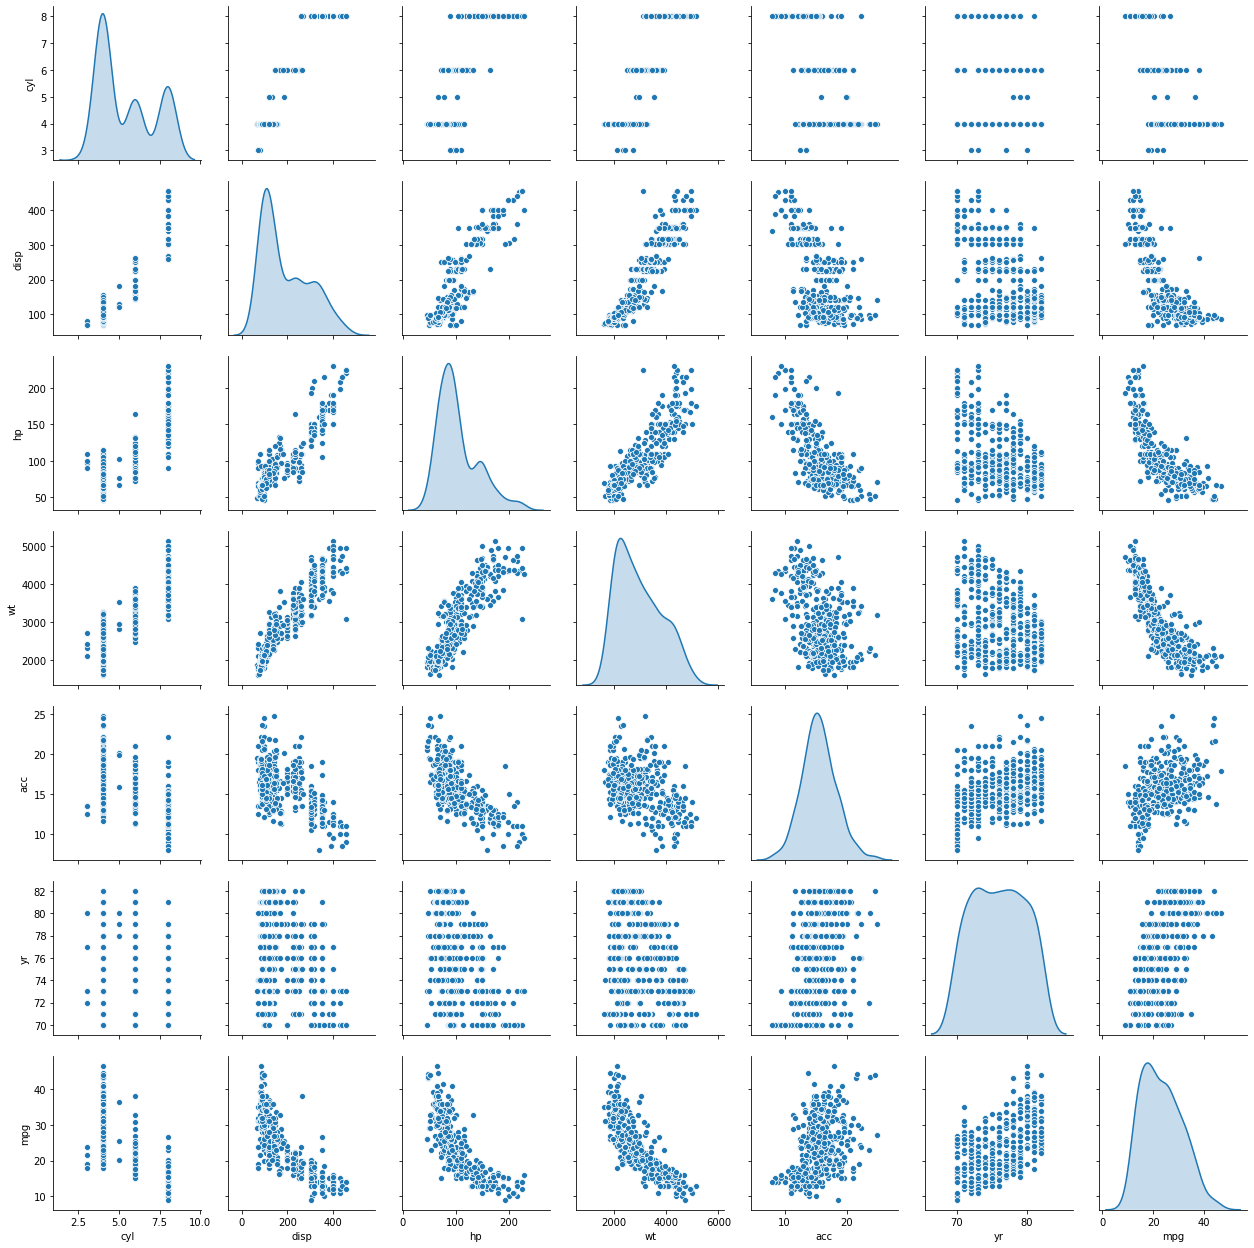

In [35]:
#Pairplot of the dataframe
sns.pairplot(data=df, diag_kind='kde')

Interpretation:

1) From the Pair Plot, it is evident from the distribution of columns 'cyl', 'disp', 'hp', 'wt' that they have 2 or more peaks in their distribution. This suggests there are more than 2 values along their X axis that has a high frequency of occurence.

2) Therefore there could be two or more clusters of cars grouped based on their similarities.

# Performing a Hierarchical Clustering 

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Visualization through a Scatter Plot to find the optimal number of clusters is not possible due to more than 2 Features

#Dropping the 'mpg' column and storing the resutant in a new data frame to perform Clustering
df1 = df.drop('mpg', axis=1)
df1.head()

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [22]:
#Agglomerative Clustering Technique

#Obtaining the Linkage Matrix
Z = linkage(df1, 'ward', metric='euclidean')

In [23]:
Z

array([[3.83000000e+02, 3.84000000e+02, 7.00000000e-01, 2.00000000e+00],
       [1.80000000e+01, 2.90000000e+01, 1.00000000e+00, 2.00000000e+00],
       [6.60000000e+01, 8.60000000e+01, 1.00000000e+00, 2.00000000e+00],
       ...,
       [7.88000000e+02, 7.89000000e+02, 6.32539474e+03, 1.32000000e+02],
       [7.90000000e+02, 7.91000000e+02, 8.58033787e+03, 2.66000000e+02],
       [7.92000000e+02, 7.93000000e+02, 2.06261584e+04, 3.98000000e+02]])

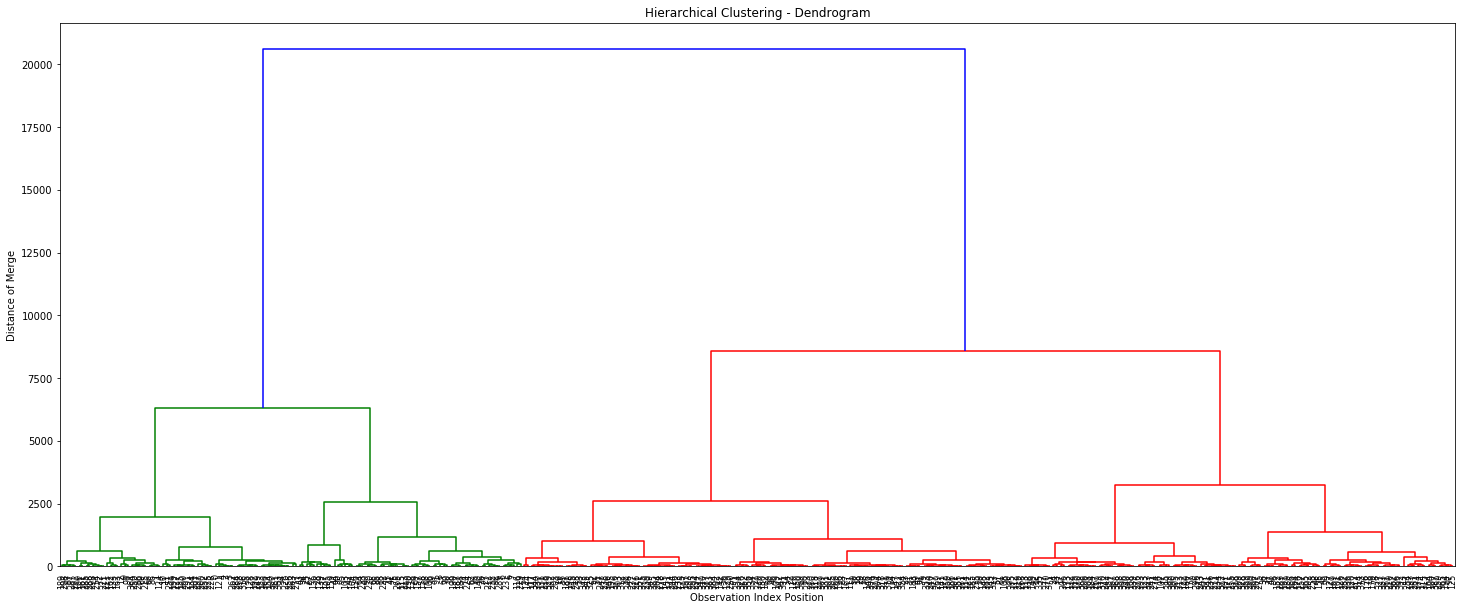

In [24]:
#Dedrogram Plot to find the optimal number of clusters
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering - Dendrogram')
plt.xlabel('Observation Index Position')
plt.ylabel('Distance of Merge')
dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=8., 
)
plt.show()

Interpretation from the Dendrogram Plot:

1) From the plot, we observe there are two clusters of cars. One, indicated by green colour and the other indicated by red colour.

2) The Final merge happens at a distance of 20000 units where the two clusters are forcefully merged into one. Therefore we resort to two clusters. 

3) The cut-off line can be drawn anywhere between 10000 units and 20000 units. As a result of that, we observe two vertical lines that pass through the cut-off line. This confirms the optimal number of clusters to be 2. 

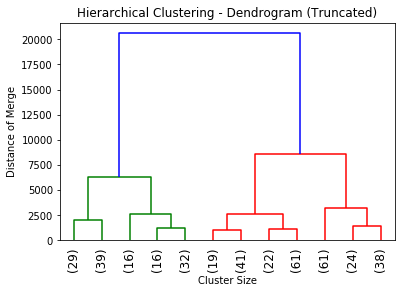

In [25]:
#Truncated Dendrogram Plot - To find the last 15 merges
plt.title('Hierarchical Clustering - Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance of Merge')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12.)
plt.show()

Interpretation from the Truncated Dendrogram Plot:

When we observe the last 12 merges, we observe a cluster merge at a distance approximately 2500 units and a cluster merge at a distance approximately 3000 units, both marked by red colour. We can also consider a cluster merge at a distance approximately 6250 units beyond which the merges are forced to happen. Therefore the cut-off line can be drawn anywhere between 6250 and 8750 units. Therefore the optimal number of clusters is 3.

In [26]:
#Adding the CLuster column to the data frame
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 3, 1, 3, 3, 2, 2, 2,
       2, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       3, 1, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 1, 3, 1,

In [27]:
#Adding the 'clusters' array as a column to the data frame
df1['Cluster'] = clusters
df1.head(30)

,cyl,disp,hp,wt,acc,yr,Cluster
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
5,8,429.0,198.0,4341,10.0,70,1
6,8,454.0,220.0,4354,9.0,70,1
7,8,440.0,215.0,4312,8.5,70,1
8,8,455.0,225.0,4425,10.0,70,1
9,8,390.0,190.0,3850,8.5,70,1


In [28]:
#Adding 'mpg' column to the clustered data frame
df1['mpg'] = np.array(df['mpg'])
df1.head()

,cyl,disp,hp,wt,acc,yr,Cluster,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0


In [29]:
#To check the data type of 'Cluster'
df1.dtypes

cyl        category
disp        float64
hp          float64
wt            int64
acc         float64
yr         category
Cluster       int32
mpg         float64
dtype: object

In [30]:
#Converting the data type of column 'Cluster'
df1['Cluster'] = df1.Cluster.astype('category')

In [32]:
#Splitting the data frame based on the different cluster labels
cluster1 = df1[df1['Cluster'] == 1]
cluster1.shape

(132, 8)

In [33]:
cluster2 = df1[df1['Cluster'] == 2]
cluster2.shape

(143, 8)

In [34]:
cluster3 = df1[df1['Cluster'] == 3]
cluster3.shape

(123, 8)

In [50]:
#Building a Linear Regression Model for 'cluster1'
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
#Creating the Feature Set X and Target Set y
X = cluster1.drop('mpg', axis=1)
y = cluster1['mpg']

In [52]:
#Creating the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('Training R2:', (lr.score(X_train,y_train)))
print('Testing R2:', (lr.score(X_test,y_test)))

Training R2: 0.7034855214691447
Testing R2: 0.5113980018977574


In [54]:
#Building a Linear Regression Model for 'cluster2'
#Creating the Feature Set X and Target Set y
X = cluster2.drop('mpg', axis=1)
y = cluster2['mpg']

In [55]:
#Creating the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [56]:
lr.fit(X_train,y_train)
print('Training R2:', (lr.score(X_train,y_train)))
print('Testing R2:', (lr.score(X_test,y_test)))

Training R2: 0.6942964409102383
Testing R2: 0.6454388449681621


In [57]:
#Building a Linear Regression Model for 'cluster3'
#Creating the Feature Set X and Target Set y
X = cluster3.drop('mpg', axis=1)
y = cluster3['mpg']

In [58]:
#Creating the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [95]:
lr.fit(X_train,y_train)
print('Training R2:', (lr.score(X_train,y_train)))
print('Testing R2:', (lr.score(X_test,y_test)))

Training R2: 0.596051344262704
Testing R2: 0.49192349098141475


C:\Users\hari_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hari_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


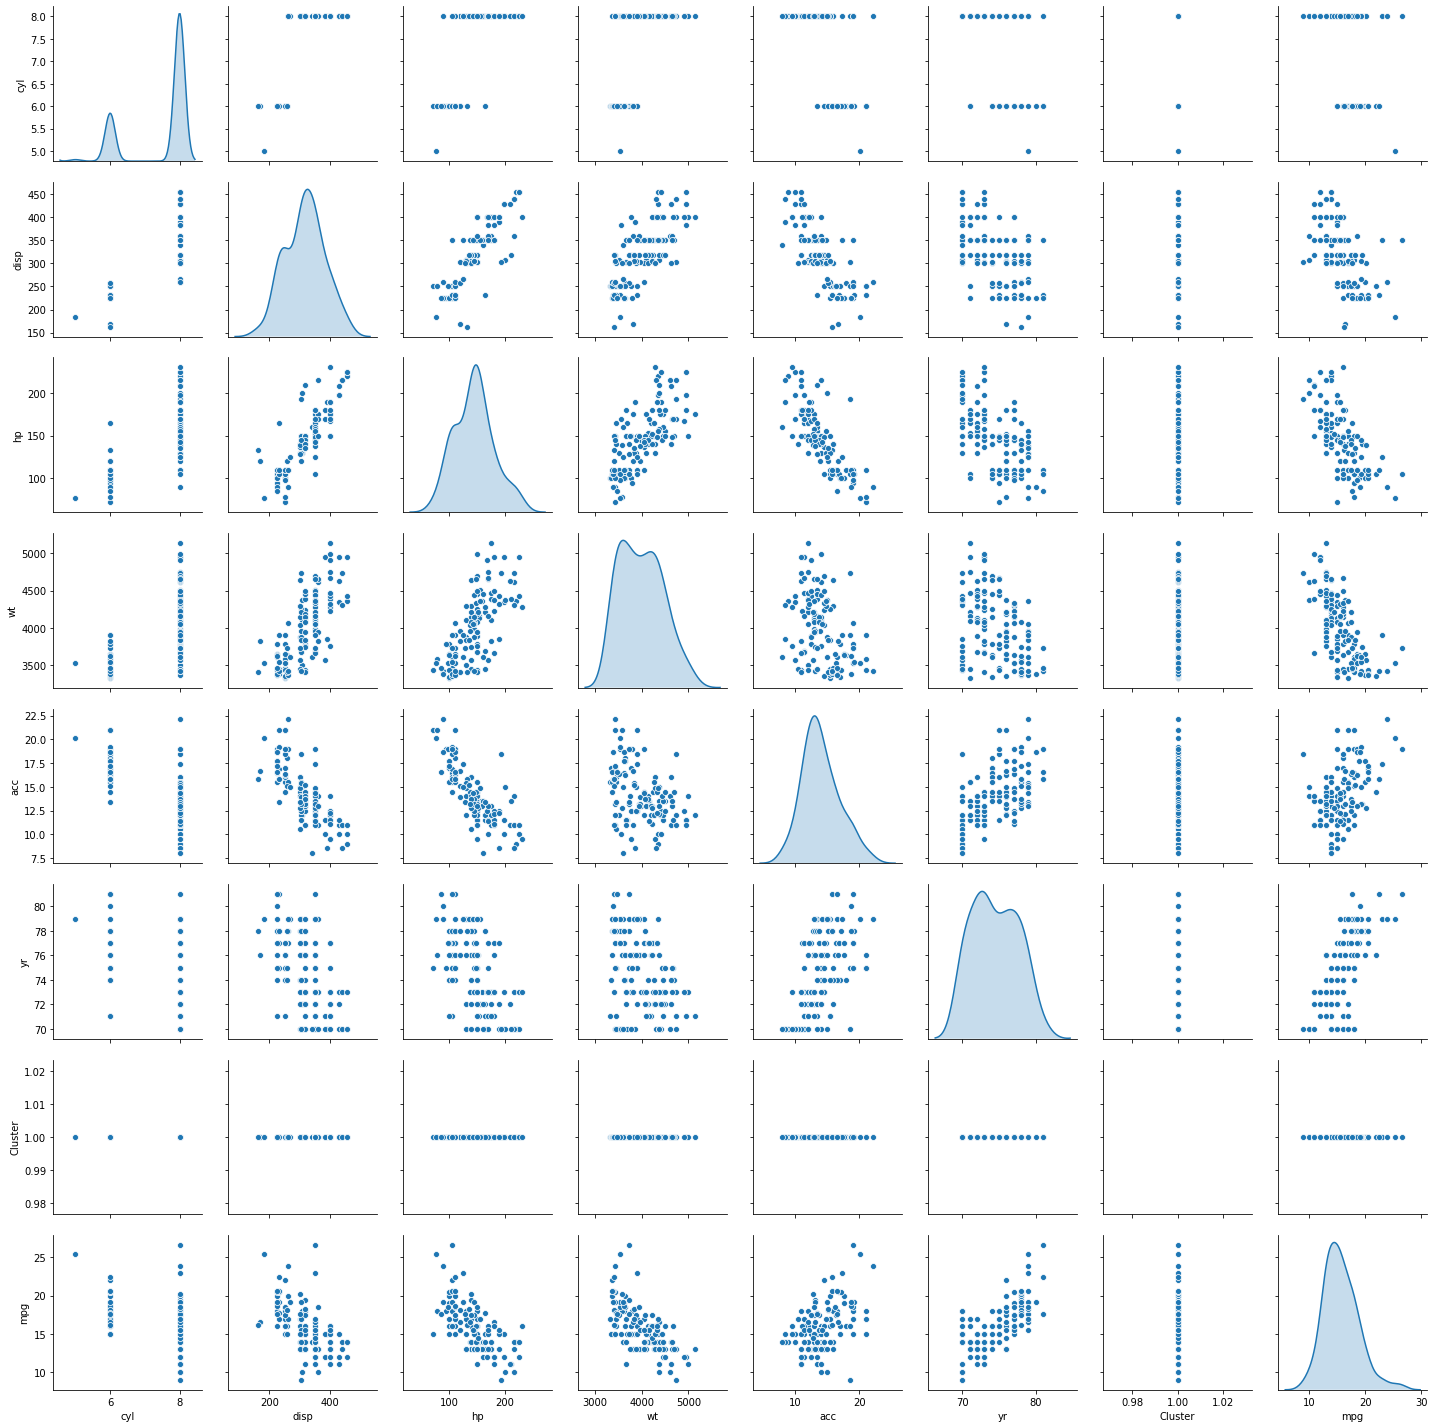

In [96]:
#Pairplot of 'cluster1'
sns.pairplot(data=cluster1, diag_kind='kde')

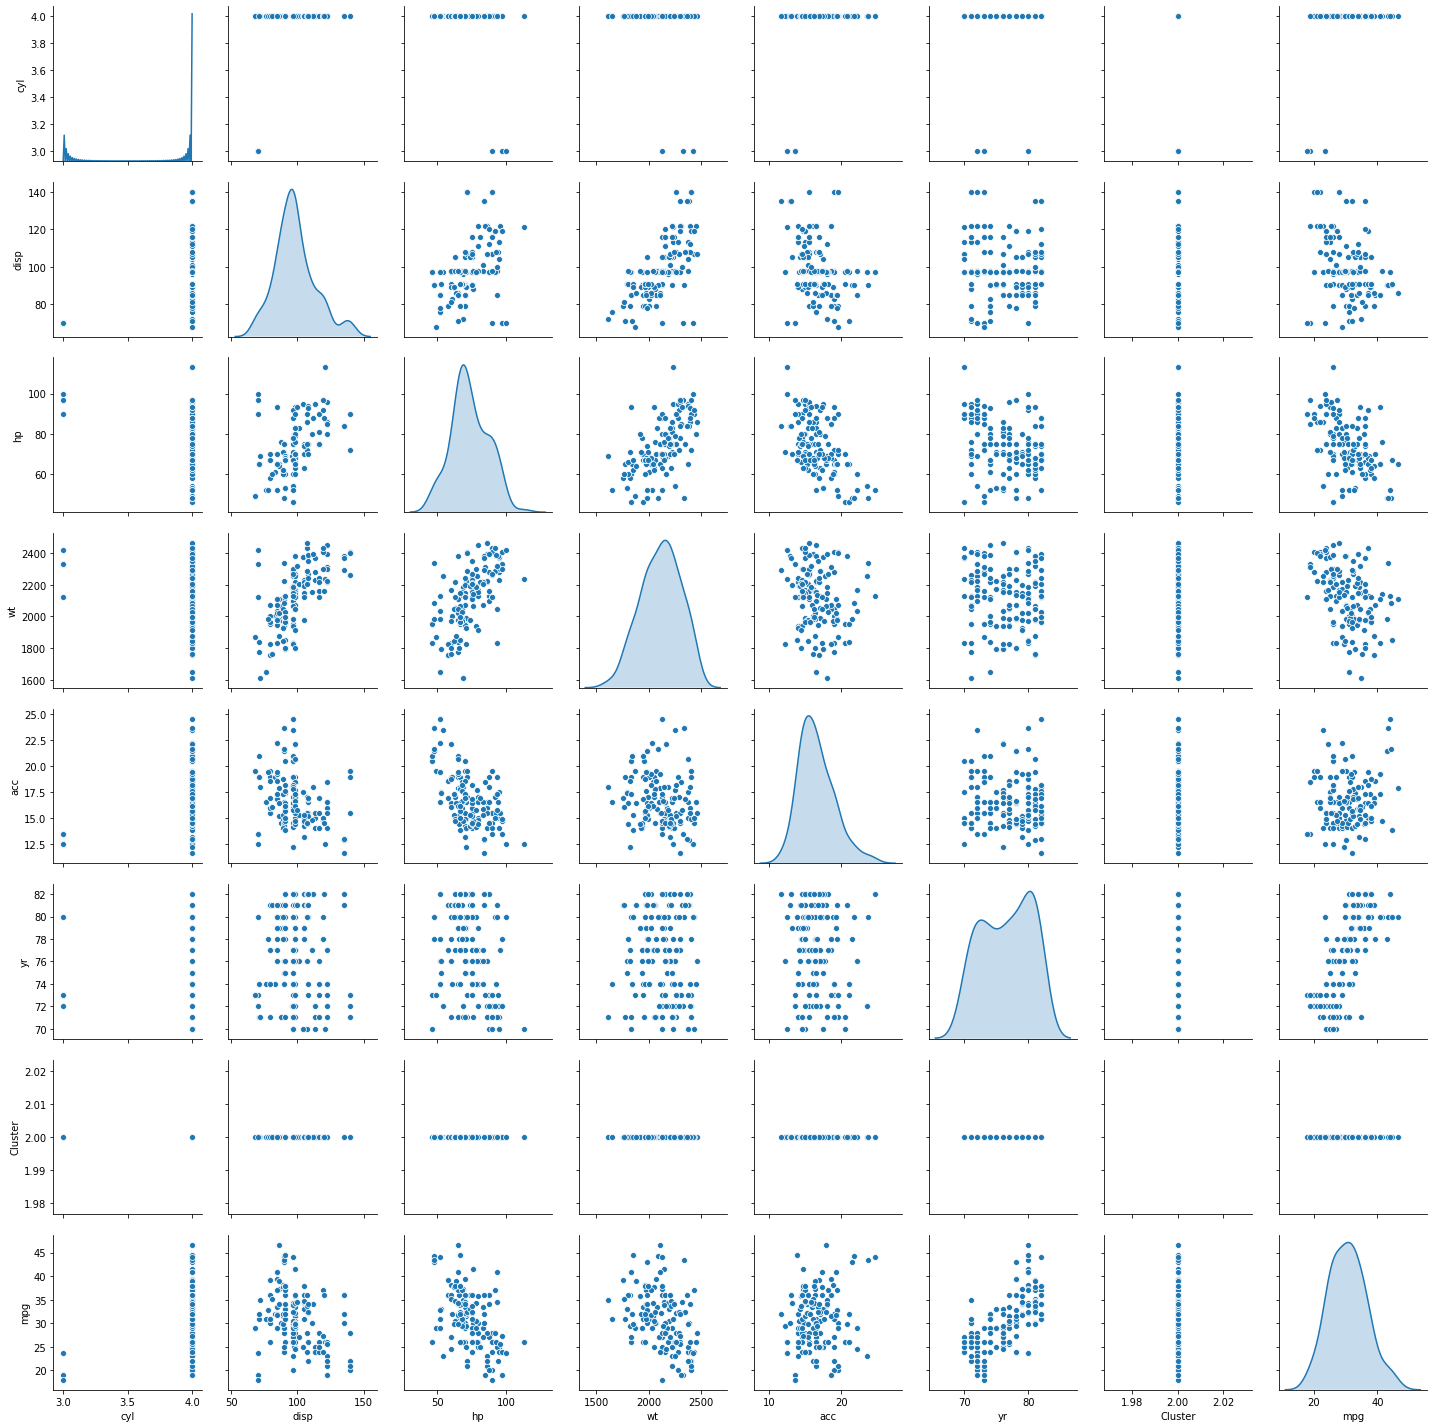

In [97]:
#Pairplot of 'cluster2'
sns.pairplot(data=cluster2, diag_kind='kde')

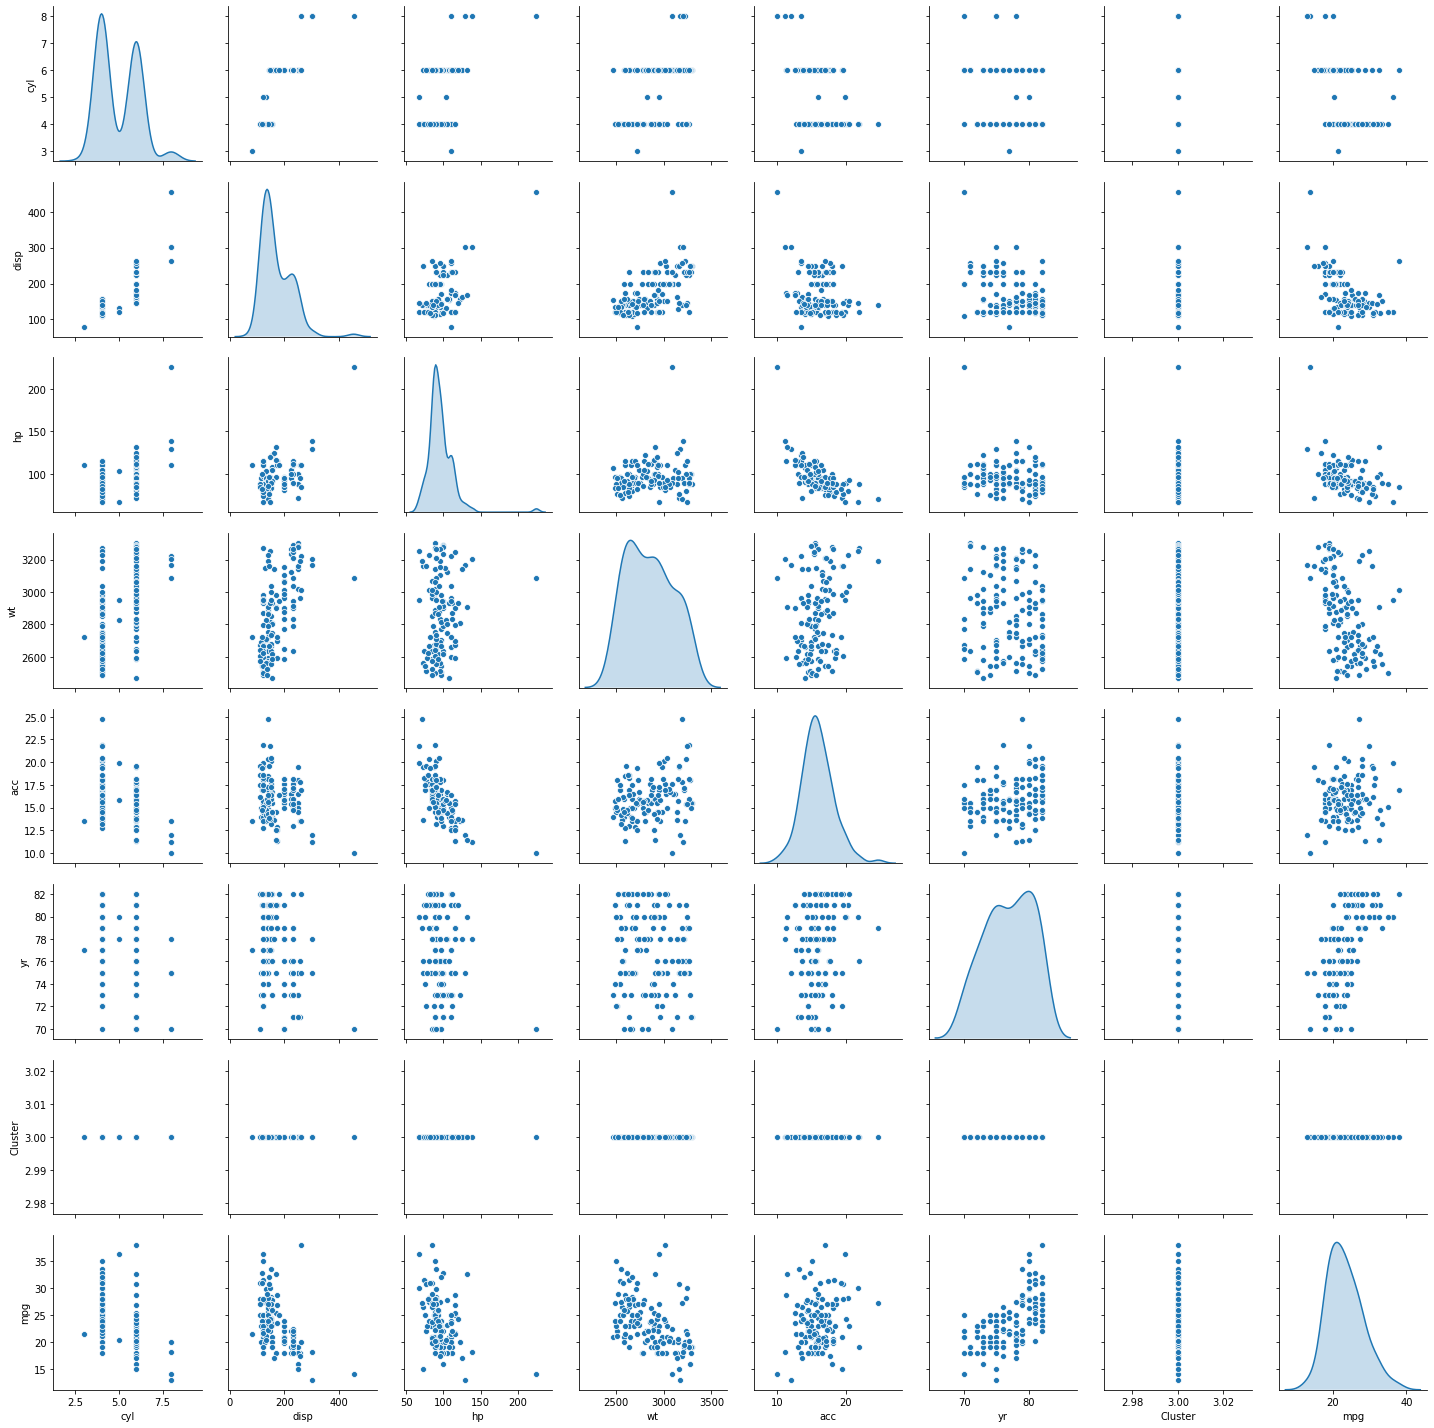

In [98]:
#Pairplot of 'cluster3'
sns.pairplot(data=cluster3, diag_kind='kde')

Interpretation:

1) Cluster 2 provides better Training and Testing R2 than the other two clusters.

2) The reason for poor performance of these clusters can be observed from their respective Pairplots. Despite Clustering and separating into different data frames, the pairplots still have multiple peaks in them.  

3) Observing the descriptive statistics of the individual clusters, we find there are OUTLIERS in them. Records with a certain range of values in the Features fall under a Cluster Label. But there are also records which have extreme values in the Features that are part of the same Cluster Label. This makes the performance poor.